## Data Wrangling

In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [53]:
folder = 'C:/Users/Laura GF/Documents/GitHub/machine-learning-capstone/data/'
raw_data = f'{folder}raw-data/'
clean_data = f'{folder}clean-data/'


### Topic: Fuel consumption ratings (Statistics Canada)

Site https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

In [54]:
fuel_df = pd.read_csv(Path(clean_data,"1995_2022_vehicle_fuel_consumption.csv"))

In [57]:
fuel_df[fuel_df['make_']=="Ford"]['co2_rating'].mean()

4.033482142857143

### Topic: Number of cars sold in Canada by make and model

Site: https://www.goodcarbadcar.net/


The data was extracted using Scrapy

In [13]:
# Read data
# long format
json_2021_df = pd.read_json(Path(raw_data,"2021_canada_vehicle_sales.json")).set_index("model")
json_2021_df.dropna(how="all", inplace=True)
# Wide format
wide_2021 = pd.read_json(Path(raw_data,"2021_canada_vehicle_sales.json"))
df_2021 = wide_2021.join(wide_2021.reset_index()['model'].str.split(' ', 1, expand=True).rename(columns={0:'make', 1:'model_'})).drop(columns=["model"])
df_2021['year'] = 2021

# alternative_shape
long_format_2021 = pd.DataFrame(json_2021_df.T.unstack()).reset_index().rename(columns={"level_1":"month",0:"number_units_sold"})
long_format_2021_sep = long_format_2021.join(long_format_2021.reset_index()['model'].str.split(' ', 1, expand=True).rename(columns={0:'make', 1:'model_'})).drop(columns=["model"])
long_format_2021_sep['year'] = 2021

# 2020 
json_2020_df = pd.read_json(Path(raw_data,"2020_canada_vehicle_sales.json")).set_index("model")
json_2020_df.dropna(how="all", inplace=True)
wide_2020 =  pd.read_json(Path(raw_data,"2020_canada_vehicle_sales.json"))
df_2020 = wide_2020.join(wide_2020.reset_index()['model'].str.split(' ', 1, expand=True).rename(columns={0:'make', 1:'model_'})).drop(columns=["model"])
df_2020['year'] = 2020

long_format_2020 = pd.DataFrame(json_2020_df.T.unstack()).reset_index().rename(columns={"level_1":"month",0:"number_units_sold"})
long_format_2020_sep = long_format_2020.join(long_format_2020.reset_index()['model'].str.split(' ', 1, expand=True).rename(columns={0:'make', 1:'model_'})).drop(columns=["model"])
long_format_2020_sep['year'] = 2020

json_2019_df = pd.read_json(Path(raw_data,"2019_canada_vehicle_sales.json")).set_index("model")
json_2019_df.dropna(how="all", inplace=True)
wide_2019 = pd.read_json(Path(raw_data,"2019_canada_vehicle_sales.json"))
df_2019 = wide_2019.join(wide_2019.reset_index()['model'].str.split(' ', 1, expand=True).rename(columns={0:'make', 1:'model_'})).drop(columns=["model"])
df_2019['year'] = 2019

long_format_2019 = pd.DataFrame(json_2019_df.T.unstack()).reset_index().rename(columns={"level_1":"month",0:"number_units_sold"})
long_format_2019_sep = long_format_2019.join(long_format_2019.reset_index()['model'].str.split(' ', 1, expand=True).rename(columns={0:'make', 1:'model_'})).drop(columns=["model"])
long_format_2019_sep['year'] = 2019

In [15]:
month_dic = {
            'jan': "01",
            'feb': "02",
            'mar': "03",
            'apr': "04",
            'may': "05",
            'jun': "06",
            'jul': "07",
            'aug': "08",
            'sep': "09",
            'oct': "10",
            'nov': "11",
            'dec': "12"
            }

In [17]:
long_format_2019_sep['month']  = long_format_2019_sep['month'].map(month_dic) 

In [28]:
df_2019

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,make,model_,year
0,86,56,218,286,209,177,167,138,195,125,108,106,Acura,ILX,2019
1,167,210,494,551,377,352,409,560,599,343,327,368,Acura,MDX,2019
2,0,1,4,2,6,4,0,2,0,1,1,1,Acura,NSX,2019
3,473,454,591,764,980,894,819,963,973,985,941,879,Acura,RDX,2019
4,5,5,3,4,6,4,2,11,5,5,5,0,Acura,RLX,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,70,137,155,164,209,224,149,125,154,139,157,267,Volvo,60-Series,2019
285,50,25,33,28,27,30,34,11,15,2,28,12,Volvo,90-Series,2019
286,109,116,227,226,191,99,181,191,134,216,231,211,Volvo,XC40,2019
287,125,137,234,320,280,307,343,283,305,240,241,230,Volvo,XC60,2019


In [26]:
df_2019[df_2019['make']=="Acura"]

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,make,model_,year
0,86,56,218,286,209,177,167,138,195,125,108,106,Acura,ILX,2019
1,167,210,494,551,377,352,409,560,599,343,327,368,Acura,MDX,2019
2,0,1,4,2,6,4,0,2,0,1,1,1,Acura,NSX,2019
3,473,454,591,764,980,894,819,963,973,985,941,879,Acura,RDX,2019
4,5,5,3,4,6,4,2,11,5,5,5,0,Acura,RLX,2019
5,176,342,402,0,282,230,246,154,280,268,223,270,Acura,TLX,2019


In [27]:
df_2019[df_2019['make']=="Land"]

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,make,model_,year
164,21,41,144,43,63,63,60,48,48,62,37,63,Land,Rover Discovery / LR4,2019
165,54,70,140,148,45,78,76,60,133,97,92,83,Land,Rover Discovery Sport,2019
166,111,101,259,198,141,119,79,126,158,159,108,173,Land,Rover Range Rover,2019
167,53,55,179,61,198,199,117,179,120,172,226,229,Land,Rover Range Rover Evoque,2019
168,207,213,411,202,256,256,225,274,336,301,268,250,Land,Rover Range Rover Sport,2019
169,116,129,236,161,162,187,103,171,137,161,121,115,Land,Rover Range Rover Velar,2019


In [39]:
long_format_2019_sep['number_units_sold'] = long_format_2019_sep['number_units_sold'].str.replace(",","").astype(int)

In [40]:
long_format_2019_sep[long_format_2019_sep['make']=="Acura"]['number_units_sold'].sum()

19294

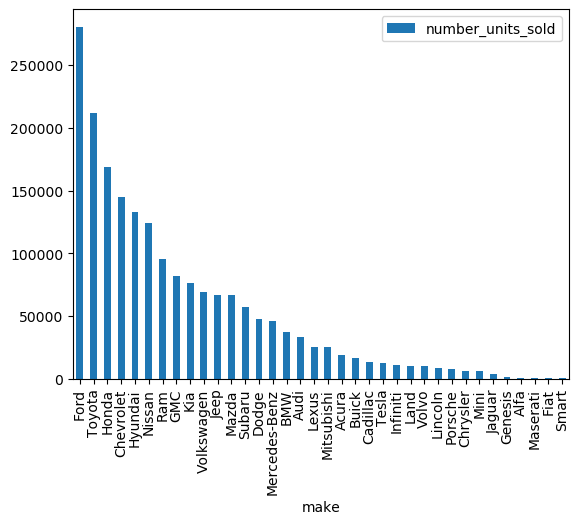

In [52]:
long_format_2019_sep[['make','number_units_sold']].groupby("make").sum().reset_index().sort_values(by='number_units_sold', ascending=False).set_index('make').plot(kind='bar')

In [59]:
fuel_df[fuel_df['make_']=="Toyota"]['co2_rating'].mean()

5.958677685950414

In [61]:
fuel_df[fuel_df['make_']=="Honda"]['co2_rating'].mean()

6.564102564102564

In [62]:
fuel_df[fuel_df['make_']=="Chevrolet"]['co2_rating'].mean()

3.9530864197530864

In [64]:
fuel_df[fuel_df['make_']=="Volvo"]['co2_rating'].mean()

5.115942028985507

### Topic: New motor vehicle registrations, quarterly (Statistics Canada)

Site https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010002401



### Topic: New zero-emission vehicle registrations, quarterly (Statistics Canada)

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010002501

### Topic: Sales of fuel used for road motor vehicles, annual (Statistics Canada)

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310006601

### Topic: Vehicle registrations, by type of vehicle (Statistics Canada)

https://open.canada.ca/data/en/dataset/9aea572f-f54f-42a1-b411-0b06390ed9f9